<center><b>Scikit Learn - Regression with Outliers</b></center><br>

The code below demonstrates usage of the Scikit Learn library on a regression problem with outliers.

I have implemented the DecisionTreeRegressor and KNeighborsRegressor before and after the outliers have been removed to demonstrate the affects outliers have on the algorithm.
I have visualised the outliers using boxplot for each feature

In [1]:
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
all_training_data = np.genfromtxt('data/ScikitLearn/outlierData/trainDataO.csv', delimiter=',')
all_test_data     = np.genfromtxt('data/ScikitLearn/outlierData/test.csv', delimiter=',')

# separate the label from the data. Last column is the label
training_X = all_training_data[:,:-1]
training_Y = all_training_data[:,-1]
test_X = all_test_data[:,:-1]
test_Y = all_test_data[:,-1]


In [3]:
# Check the R2 Score before the outliers are removed

decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(training_X,training_Y)

y_pred = decisionTree.predict(test_X)
r2Score = r2_score(test_Y, y_pred)
print("R2 score for DecisionTreeClassifier is: {}".format(r2Score))


R2 score for DecisionTreeClassifier is: 0.6056056814899182


In [4]:
# Check the R2 Score of KNeighborsRegressor before the outliers are removed 

knnRegressor = KNeighborsRegressor(n_neighbors=10)
knnRegressor.fit(training_X, training_Y)

y_pred = knnRegressor.predict(test_X)
r2Score = r2_score(test_Y, y_pred)
print("R2 score for KNeighborsRegressor is: {}".format(r2Score))

R2 score for KNeighborsRegressor is: 0.8725235124812014


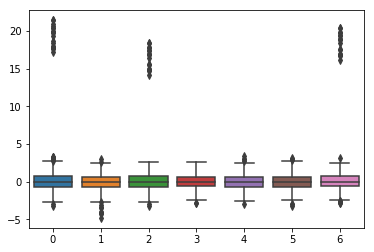

In [5]:
# Univariate Outlier Detection
# We check each features individually for outliers

sns.boxplot(data=training_X)

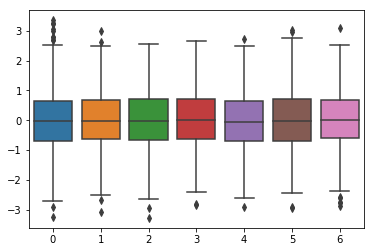

In [6]:
# removing the outlisers using zscore

z = np.abs(stats.zscore(training_X))
treshold = 3 # I've selected 3 manually based on the boxplot
outlierRows = np.where(z>treshold)
pruned_training_X = np.delete(training_X, outlierRows, 0)
pruned_training_Y = np.delete(training_Y, outlierRows, 0)

# show the new boxplot without the outliers
sns.boxplot(data=pruned_training_X)

In [7]:
# Check the R2 Score after the outliers have been removed

decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(pruned_training_X,pruned_training_Y)

y_pred = decisionTree.predict(test_X)
r2Score = r2_score(test_Y, y_pred)
print("R2 score for DecisionTreeClassifier is: {}".format(r2Score))

R2 score for DecisionTreeClassifier is: 0.6701384908960004


In [8]:
# Check the R2 Score of KNeighborsRegressor after the outliers have been removed 

knnRegressor = KNeighborsRegressor(n_neighbors=10)
knnRegressor.fit(pruned_training_X, pruned_training_Y)

y_pred = knnRegressor.predict(test_X)
r2Score = r2_score(test_Y, y_pred)
print("R2 score for KNeighborsRegressor is: {}".format(r2Score))

R2 score for KNeighborsRegressor is: 0.8722469041873714
